Grupo:
### Carlos Mauricio Arteaga Bermudez
### Miguel Angel Pablos Perea

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Luego de que tener los paquetes activados dentro de nuestro ambiente de python podremos usar las fucnciones que se encuentren en la librería.

### Carga de información en `pandas`

Para nuestro  ejercicio usaremos los siguientes conjuntos de datos:

1. NEW ENGLAND AREA.csv
2. ATLANTIC SOUTH AREA.csv
3. NEW YORK CITY AREA.csv
4. CHICAGO AREA.csv
5. NORTH FLORIDA AREA.csv
6. DC-MARYLAND-VIRGINIA AREA.csv
7. GREAT LAKES AREA.csv
8. NORTHWEST-ROCKY MOUNTAIN AREA.csv
9. MIDWEST AREA.csv
10. SOUTHWEST AREA.csv
11. LOS ANGELES AREA.csv
12. HOUSTON AREA.csv
13. CALIFORNIA NORTH AREA.csv
14. CENTRAL-SOUTH TEXAS AREA.csv
15. DALLAS AREA.csv
16. PHILADELPHIA AREA.csv
17. TENNESSEE AREA.csv
18. OHIO AREA.csv
19. SOUTH FLORIDA AREA.csv

Cada uno de estos conjuntos de datos contiene la información de:

1. *mou_Mean:* Número medio de minutos de uso mensuales
2. *custcare_Mean:* Número medio de llamadas de atención al cliente
3. *area:*  Área geografica
4. *creditcd:* Indicador de tarjeta de crédito
5. *eqpdays:* Número de días (antigüedad) del equipo actual

Además, se incluye _Credito_dias.csv_ con la información de 2 variables adicionales para los registros las cuales son:

1. _creditcd:_ Indicador de tarjeta de crédito
2. _eqpdays:_ Número de días (antigüedad) del equipo actual

Revisaremos inicialmente los datos contenidos en _Credito_dias.csv_ para revisar algunas funciones interesantes de `pandas`, usaremos el comando 
```python
pd.read_csv("archivo.csv")
```
Podemos definir el número de registros a imprimir usando
```python
pd.options.display.min_rows=10
````

In [2]:
df=pd.read_csv('../Datos/Clase 2/Credito_dias.csv', sep=",",index_col="Customer_ID")
df

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675
1089806,1863.0,294.26,Y,218
1076695,4155.0,433.16,N,222
...,...,...,...,...
1027614,2570.0,484.31,Y,611
1098422,2105.0,583.36,Y,1243
1096497,3690.0,294.29,Y,212


### Ejercicio 1
Determinar los percentiles 25, 50 y 75 para las columnas ttomou, totrev, eqpdays

In [19]:
#Utilizamos la funcion .describe() para calcular los percentiles 25, 50 y 75 de la columna "totmou"
print(df['totmou'].quantile(0.25)) # Con la funcion .quantile() podemos calcular cada percentil por separado
df["totmou"].describe() 

2576.0


count     10000.000000
mean       7692.804866
std        8657.917883
min           0.000000
25%        2576.000000
50%        5262.000000
75%        9823.250000
max      163264.176700
Name: totmou, dtype: float64

In [16]:
#Utilizamos la funcion .describe() para calcular los percentiles 25, 50 y 75 de la columna "totrev"
df["totrev"].describe()

count    10000.000000
mean      1042.133807
std        857.144895
min         11.100000
25%        526.787500
50%        820.235000
75%       1272.975000
max      13426.600000
Name: totrev, dtype: float64

In [21]:
df.describe(include='all') #Con el parametro include='all' muestra los datos estadisticos basicos de cada columna

,totmou,totrev,creditcd,eqpdays
count,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,2,NaN
top,NaN,NaN,Y,NaN
freq,NaN,NaN,6948,NaN
mean,7692.804866,1042.133807,NaN,386.794500
std,8657.917883,857.144895,NaN,252.720196
min,0.000000,11.100000,NaN,-5.000000
25%,2576.000000,526.787500,NaN,210.000000
50%,5262.000000,820.235000,NaN,338.000000
75%,9823.250000,1272.975000,NaN,522.000000


In [22]:
import os
os.listdir("../Datos/Clase 2") #Nos mustra una lista de los documentos .csv en la carpeta de Datos

['.ipynb_checkpoints',
 'ATLANTIC SOUTH AREA.csv',
 'CALIFORNIA NORTH AREA.csv',
 'CENTRAL-SOUTH TEXAS AREA.csv',
 'CHICAGO AREA.csv',
 'Credito_dias.csv',
 'DALLAS AREA.csv',
 'DC-MARYLAND-VIRGINIA AREA.csv',
 'GREAT LAKES AREA.csv',
 'HOUSTON AREA.csv',
 'LOS ANGELES AREA.csv',
 'MIDWEST AREA.csv',
 'NEW ENGLAND AREA.csv',
 'NEW YORK CITY AREA.csv',
 'NORTH FLORIDA AREA.csv',
 'NORTHWEST-ROCKY MOUNTAIN AREA.csv',
 'OHIO AREA.csv',
 'PHILADELPHIA AREA.csv',
 'SOUTH FLORIDA AREA.csv',
 'SOUTHWEST AREA.csv',
 'TENNESSEE AREA.csv']

In [23]:
# este codigo concatena todos los .csv en la carpeta Datos para su posterior agregacion al DataFrame principal
print("Definición de los símbolos de las acciones")
areas = ['ATLANTIC SOUTH AREA',
 'CALIFORNIA NORTH AREA',
 'CENTRAL-SOUTH TEXAS AREA',
 'CHICAGO AREA',
 'DALLAS AREA',
 'DC-MARYLAND-VIRGINIA AREA',
 'GREAT LAKES AREA',
 'HOUSTON AREA',
 'LOS ANGELES AREA',
 'MIDWEST AREA',
 'NEW ENGLAND AREA',
 'NEW YORK CITY AREA',
 'NORTH FLORIDA AREA',
 'NORTHWEST-ROCKY MOUNTAIN AREA',
 'OHIO AREA',
 'PHILADELPHIA AREA',
 'SOUTH FLORIDA AREA',
 'SOUTHWEST AREA',
 'TENNESSEE AREA']
lista_de_df = []
# Bucle sobre los símbolos
print(" --- Inicie el bucle sobre los símbolos --- ")
for i in areas:
    print("Procesando el símbolo: " + i)
    temp_df = pd.read_csv("../Datos/Clase 2/" + i + ".csv",index_col="Customer_ID")
    temp_df["area"] = i
    lista_de_df.append(temp_df)
    # Usando un salto de línea al final de esta cadena de caracteres por estética
    print(" --- Bucle completo sobre los símbolos --- \n")
    # Combinando en un solo DataFrame usando el concat
print("Agregando los datos")
agr_df = pd.concat(lista_de_df, axis=0)
print(agr_df.shape)
print("Cabeza del DataFrame agr_df: ")
agr_df.head()

Definición de los símbolos de las acciones
 --- Inicie el bucle sobre los símbolos --- 
Procesando el símbolo: ATLANTIC SOUTH AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CALIFORNIA NORTH AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CENTRAL-SOUTH TEXAS AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CHICAGO AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: DALLAS AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: DC-MARYLAND-VIRGINIA AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: GREAT LAKES AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: HOUSTON AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: LOS ANGELES AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: MIDWEST AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: NEW ENGLAND AREA
 --- Bucle com

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1069232,3.666667,U,ATLANTIC SOUTH AREA,N
1043846,0.000000,U,ATLANTIC SOUTH AREA,Y
1008539,0.000000,N,ATLANTIC SOUTH AREA,Y
1068315,0.000000,U,ATLANTIC SOUTH AREA,N
1074220,1.666667,U,ATLANTIC SOUTH AREA,N


In [24]:
# El Dataframe que contiene todos los archivos .csv con las areas se nombre como agr_df
agr_df.sort_index(axis=0,inplace=True)
agr_df

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1000014,0.000000,Y,CENTRAL-SOUTH TEXAS AREA,N
1000016,1.000000,N,DALLAS AREA,Y
1000021,0.333333,U,TENNESSEE AREA,Y
1000023,0.000000,N,NORTHWEST-ROCKY MOUNTAIN AREA,N
1000029,0.000000,N,NEW ENGLAND AREA,Y
...,...,...,...,...
1099907,17.333333,U,LOS ANGELES AREA,Y
1099932,0.000000,U,LOS ANGELES AREA,Y
1099963,0.000000,U,SOUTHWEST AREA,Y


La ejecución nos da como resultado una base de datos de 9997 registros correspondiente a la concatenación de todas las áreas. Se debe notar que nuestro conjunto de datos también es indexado por la columna `Customer_ID` y que la dimensión de los registros de está nueva base es menor a la de  `Creditos_dias.csv`.

 ## Cruce de información

El cruce de información es una operación esencial en el análisis de los datos. Usualmente, la posibilidad de realizar el cruce de dos o más fuentes de información es el primer paso para responder preguntas complejas acerca de los datos. Existen muchas formas de cruzar o combinar tablas de datos. El cruce de estos datos siempre tiene un propósito. Por tanto, se debe realizar un análisis de lo que se requiere antes de iniciar. Para esto, lo primero es conocer bien las fuentes de información que se van a relacionar. 

### Uniones (Joins)
Usando la librería pandas se pueden realizar 4 tipos de uniones para cruzar información entre dos fuentes de datos, ver Figura abajo. 
* INNER JOIN: este tipo de cruce incluye solo los resgistros que coincieden en las dos tablas
* LEFT JOIN:  en este tipo de cruce se incluyen todos los registros de la primera tabla aunque no aparezcan coincidencias en la segunda. Cuando no hay coincidencias en la segunda tabla los campos correspondientes a esta aparecerán como nulos.
* RIGHT JOIN: en este tipo de cruce se incluyen todos los registros de la segunda tabla aunque no aparezcan coincidencias en la primera. Cuando no hay coincidencias en la primer tabla los campos correspondientes a esta aparecerán como nulos.
* OUTER JOIN O FULL JOIN: combina todos los registros de ambas tablas aunque no existan coincidencias en la otra tabla. 

![Los tipos de uniones que se pueden ejecutar en pandas](https://letsdobigdata.files.wordpress.com/2016/03/joins.png)

La combinación a usar depende del análisis que se requiera con los datos. Lo más común es realizar un cruce de tipo Inner Join, debido a que muestra los registros cuando aparecen relacionados en ambas tablas. Sin embargo, en 
ocasiones se quiere saber que pasa con todos los registros de la primera tabla aunque no se tengan coincidencias. Alternativamente, quizá, lo menos usual es hacer combinaciones de tipo RIGHT o OUTER. Generalmente, estas son usadas cuando se quiere saber por qué no se tienen coincidencias, o cuáles registros no cumplen con la relación especificada.

Ya que desconocemos cuales son los registros perdidos en los 2 dataframes que hemos construido y es necesario para continuar nuestro preprocesamiento el unir la información.

In [25]:
#Se combinaron los dos DataFrames utilizando la llave del indice que es el Customer_ID	
df3=df.merge(agr_df,left_index=True,right_index=True,how="inner")
df3

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y
Customer_ID,,,,,,,,
1082423,7269.0,906.58,Y,371,14.333333,U,NEW ENGLAND AREA,Y
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH AREA,N
1031705,4152.0,577.39,Y,675,3.000000,U,NEW YORK CITY AREA,Y
1089806,1863.0,294.26,Y,218,11.000000,U,CHICAGO AREA,Y
1076695,4155.0,433.16,N,222,0.000000,U,NORTH FLORIDA AREA,N
...,...,...,...,...,...,...,...,...
1027614,2570.0,484.31,Y,611,0.666667,U,CHICAGO AREA,Y
1098422,2105.0,583.36,Y,1243,0.000000,U,SOUTHWEST AREA,Y
1096497,3690.0,294.29,Y,212,0.666667,Y,NEW ENGLAND AREA,Y


In [26]:
df.head(2) #Estructura del DataFrame original

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83


In [27]:
agr_df.head(2) #Estructura del DataFrame de las areas

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1000014,0.0,Y,CENTRAL-SOUTH TEXAS AREA,N
1000016,1.0,N,DALLAS AREA,Y


### Ejercicio 2  (Alternativa Estudiantes)
¿Cuáles son los 3 registros que no se incluyen en df3 ?

In [31]:
df_p=df.merge(agr_df,left_index=True,right_index=True, how="left",indicator=True) # al hacer el merge con el parametro how="left" la cantidad de indices son nuevamente 10000 rows
# Utilizando el parametro indicator=True agregamos una columna al DataFrame que nos permite identificar si el dato fila viene de los dos DataFrames
df_p

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,_merge
Customer_ID,,,,,,,,,
1082423,7269.0,906.58,Y,371,14.333333,U,NEW ENGLAND AREA,Y,both
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH AREA,N,both
1031705,4152.0,577.39,Y,675,3.000000,U,NEW YORK CITY AREA,Y,both
1089806,1863.0,294.26,Y,218,11.000000,U,CHICAGO AREA,Y,both
1076695,4155.0,433.16,N,222,0.000000,U,NORTH FLORIDA AREA,N,both
...,...,...,...,...,...,...,...,...,...
1027614,2570.0,484.31,Y,611,0.666667,U,CHICAGO AREA,Y,both
1098422,2105.0,583.36,Y,1243,0.000000,U,SOUTHWEST AREA,Y,both
1096497,3690.0,294.29,Y,212,0.666667,Y,NEW ENGLAND AREA,Y,both


In [32]:
#Al utilizar el cruze contrario para verificar si se logra identificar los datos que no aparecian en el primer cruce
df_p = df.merge(agr_df, left_index=True, right_index=True, how="right") #how="right" el metodo nos agrupo los datos con un total de 9997 rows × 10 columns
df_p = df_p.reset_index() # Utilice el metodo .reset_index() para convertir 'Customer_ID' denuevo en una columna e identificar si los datos estaban completos
print(df_p['Customer_ID'].isnull().value_counts()) # este print nos demuestra que no hay datos null en la columna de identificacion 'Customer_ID'
df_p

Customer_ID
False    9997
Name: count, dtype: int64


,Customer_ID,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y
0,1000014,642.00000,1370.94,N,354,0.000000,Y,CENTRAL-SOUTH TEXAS AREA,N
1,1000016,15226.03000,2311.08,Y,697,1.000000,N,DALLAS AREA,Y
2,1000021,79406.01667,6751.70,Y,143,0.333333,U,TENNESSEE AREA,Y
3,1000023,64174.80667,7419.73,N,350,0.000000,N,NORTHWEST-ROCKY MOUNTAIN AREA,N
4,1000029,42715.00000,3829.33,Y,183,0.000000,N,NEW ENGLAND AREA,Y
...,...,...,...,...,...,...,...,...,...
9992,1099907,17843.00000,1457.01,Y,184,17.333333,U,LOS ANGELES AREA,Y
9993,1099932,14079.00000,1538.55,Y,275,0.000000,U,LOS ANGELES AREA,Y
9994,1099963,9722.00000,1559.16,Y,946,0.000000,U,SOUTHWEST AREA,Y
9995,1099981,7248.00000,1417.30,Y,882,0.333333,U,SOUTHWEST AREA,NaN


In [33]:
#Utilizamos la columna '_merge' para identificar de que DataFrame eran los 3 datos faltantes.
df_outer = df.merge(agr_df, left_index=True, right_index=True, how="left", indicator=True) 
#df_outer El metodo left nos arroja las 10000 rows pero para identificar los datos faltantes, la columna _merge nos puede dejar ver que datos solo vienen de una columna
df_outer['_merge'].value_counts()

_merge
both          9997
left_only        3
right_only       0
Name: count, dtype: int64

In [34]:
#Utilizamos un filtro en la columna '_merge' para traer los datos que eran iguales a 'left_only'
missing = df_outer[df_outer['_merge']=='left_only']  
missing # Encontramos cuales son los datos que vienen unicamente de el df izquierdo 

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,_merge
Customer_ID,,,,,,,,,
1050270,1409.0,407.02,Y,102,NaN,NaN,NaN,NaN,left_only
1020629,15284.0,2370.62,N,445,NaN,NaN,NaN,NaN,left_only
1020451,3604.0,662.42,Y,675,NaN,NaN,NaN,NaN,left_only


### Ejercicio 2  (Profesor)
¿Cuáles son los 3 registros que no se incluyen en df3 ?


In [35]:
df.index.isin(df3.index)

array([ True,  True,  True, ...,  True,  True,  True])

In [36]:
sin_registros=df.index.isin(df3.index)
df.iloc[~sin_registros]

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1050270,1409.0,407.02,Y,102
1020629,15284.0,2370.62,N,445
1020451,3604.0,662.42,Y,675


Si deseamos realizar una filtración sobre algún valor relevante por ejemplo el área podremos revertir el proceso usando el operador `==`  que retorna `True` en el caso que dos objetos tengan el mismo valor

In [37]:
new_england=df3[df3["area"]=="NEW ENGLAND AREA"]
new_england


,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y
Customer_ID,,,,,,,,
1082423,7269.0,906.58,Y,371,14.333333,U,NEW ENGLAND AREA,Y
1076771,288.0,374.98,Y,284,0.000000,U,NEW ENGLAND AREA,Y
1083737,1928.0,396.78,Y,261,0.000000,U,NEW ENGLAND AREA,Y
1078557,2781.0,590.26,Y,276,0.000000,N,NEW ENGLAND AREA,Y
1018015,24069.0,2129.74,Y,199,2.000000,N,NEW ENGLAND AREA,Y
...,...,...,...,...,...,...,...,...
1059454,942.0,625.98,Y,323,0.000000,U,NEW ENGLAND AREA,Y
1036973,2538.0,981.41,Y,688,0.000000,U,NEW ENGLAND AREA,Y
1073829,2812.0,454.64,Y,342,0.000000,U,NEW ENGLAND AREA,Y


El comando   `df3["area"]=="NEW ENGLAND AREA"`

In [38]:
df3["area"]=="NEW ENGLAND AREA"

Customer_ID
1082423     True
1069232    False
1031705    False
1089806    False
1076695    False
           ...  
1027614    False
1098422    False
1096497     True
1087248    False
1099003    False
Name: area, Length: 9997, dtype: bool

devuelve una serie boleana  con el mismo número de filas de la base`df3`, donde cada valor es `True` o `False` dependiendo si el valor de `area` de un registro  toma el valor de "NEW ENGLAND AREA" 

### Agrupación por área geográfica

En el Analisis de la información se suelen usar funciones de resumen, las cuales plantean el agrupamiento de ciertas características por categorías. Para más información consultar [gropby().](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

Para nuestro desarrollo es de interés el revisar si el comportamiento de las variables se mantiene en cada una de las áreas geográficas.


In [39]:
df3.groupby("area")

Aquí, el objeto DataFrameGroupBy  contiene un objeto DataFrame para cada grupo (en este caso, un objeto DataFrame para cada símbolo). Específicamente, cada elemento del objeto es una tupla que contiene el identificador de grupo (en este caso el símbolo), y las filas correspondientes del DataFrame que tienen ese símbolo).

La librería `pandas`  permite iterar sobre el objeto groupby() para ver lo que hay dentro:

In [40]:
group_df = df3.groupby(["area"]) # Datos del grupo en df3 filtrados por el área
# Haciendo un bucle a través de los grupos
for item in group_df:
    print(type(item)) # Mostrando el tipo de artículo en df3
    print(item[0]) # área
    print(item[1].head()) # DataFrame

<class 'tuple'>
('ATLANTIC SOUTH AREA',)
              totmou   totrev creditcd_x  eqpdays  custcare_Mean new_cell  \
Customer_ID                                                                 
1069232      13552.0  1172.25          N       83       3.666667        U   
1043846       7294.0  1495.18          Y      460       0.000000        U   
1008539       4078.0  1257.05          Y     1019       0.000000        N   
1068315       5124.0   652.27          N      377       0.000000        U   
1074220       6648.0   590.21          N      295       1.666667        U   

                            area creditcd_y  
Customer_ID                                  
1069232      ATLANTIC SOUTH AREA          N  
1043846      ATLANTIC SOUTH AREA          Y  
1008539      ATLANTIC SOUTH AREA          Y  
1068315      ATLANTIC SOUTH AREA          N  
1074220      ATLANTIC SOUTH AREA          N  
<class 'tuple'>
('CALIFORNIA NORTH AREA',)
              totmou   totrev creditcd_x  eqpdays  cus

Usando el método  `groupby()` con el método `describe()` y apliquémoslo a cada símbolo para
analizar la distribución de las características la variable ----.

In [41]:
group_df = df3.groupby(["area"]) # Datos del grupo en df3 filtrados por el área
# Bucle a través de los grupos
for item in group_df:
    print("------Área: ", item[0])
    group_df1 = item[1]
    df_relevante = group_df[["totrev"]]
    print(df_relevante.describe())

------Área:  ('ATLANTIC SOUTH AREA',)
                               totrev                                    \
                                count         mean          std     min   
area                                                                      
ATLANTIC SOUTH AREA             592.0   903.497399   697.197572  106.95   
CALIFORNIA NORTH AREA           599.0  1136.348013   922.069148  105.14   
CENTRAL-SOUTH TEXAS AREA        409.0  1174.366577   920.804942   48.53   
CHICAGO AREA                    496.0   892.133206   669.068444   59.90   
DALLAS AREA                     518.0  1258.508784  1267.499852   84.59   
DC-MARYLAND-VIRGINIA AREA       640.0   941.692188   634.132033   86.78   
GREAT LAKES AREA                488.0   987.714324   733.521417  126.56   
HOUSTON AREA                    458.0  1127.294127   999.987571   92.38   
LOS ANGELES AREA                671.0  1031.714382   738.616227   96.74   
MIDWEST AREA                    685.0  1095.678701   945.25186

En `pandas`tenemos una manera más sencilla de mostrar estos resultados

In [42]:
#Alternativa estudiantes.
df3[["area","totrev"]].groupby("area").describe() #Aplica un describe() por cada area agrupada por las columnas ["area","totrev"]

totrev                                    \
                                count         mean          std     min   
area                                                                      
ATLANTIC SOUTH AREA             592.0   903.497399   697.197572  106.95   
CALIFORNIA NORTH AREA           599.0  1136.348013   922.069148  105.14   
CENTRAL-SOUTH TEXAS AREA        409.0  1174.366577   920.804942   48.53   
CHICAGO AREA                    496.0   892.133206   669.068444   59.90   
DALLAS AREA                     518.0  1258.508784  1267.499852   84.59   
DC-MARYLAND-VIRGINIA AREA       640.0   941.692188   634.132033   86.78   
GREAT LAKES AREA                488.0   987.714324   733.521417  126.56   
HOUSTON AREA                    458.0  1127.294127   999.987571   92.38   
LOS ANGELES AREA                671.0  1031.714382   738.616227   96.74   
MIDWEST AREA                    685.0  1095.678701   945.251868   90.42   
NEW ENGLAND AREA                525.0   941.766038   705.572889  118.51   
NEW YORK CITY AREA             1145.0  1076.263546   869.372842   74.01   
NORTH FLORIDA AREA              442.0   895.489457   642.729028   37.39   
NORTHWEST-ROCKY MOUNTAIN AREA   429.0  1083.179091   977.857935   67.80   
OHIO AREA                       437.0  1006.616499   785.713223  107.12   
PHILADELPHIA AREA               245.0   998.303592   722.348164  133.63   
SOUTH FLORIDA AREA              366.0  1167.546257   891.952255  118.62   
SOUTHWEST AREA                  584.0  1036.548630   914.475459   11.10   
TENNESSEE AREA                  268.0  1042.700597   886.731980  102.03   

                                                                       
                                    25%      50%        75%       max  
area                                                                   
ATLANTIC SOUTH AREA            464.9875  718.370  1135.3050   8171.47  
CALIFORNIA NORTH AREA          535.9900  892.340  1396.4550   7511.11  
CENTRAL-SOUTH TEXAS AREA       594.3300  895.090  1374.5800   5848.39  
CHICAGO AREA                   474.0675  718.855  1086.9250   5710.44  
DALLAS AREA                    581.6975  965.650  1484.8500  13149.85  
DC-MARYLAND-VIRGINIA AREA      525.7200  787.360  1191.5525   5029.68  
GREAT LAKES AREA               503.7325  767.960  1211.8900   5624.71  
HOUSTON AREA                   530.6400  892.180  1443.1400   8719.53  
LOS ANGELES AREA               554.2650  836.770  1271.6150   6120.84  
MIDWEST AREA                   553.0600  854.350  1338.6900  13426.60  
NEW ENGLAND AREA               497.5700  747.130  1185.8000   6939.19  
NEW YORK CITY AREA             562.3400  870.310  1297.9700  10590.01  
NORTH FLORIDA AREA             481.5225  758.190  1134.1950   6009.01  
NORTHWEST-ROCKY MOUNTAIN AREA  524.3700  805.020  1293.2200   7419.73  
OHIO AREA                      512.0700  781.040  1230.5600   8007.95  
PHILADELPHIA AREA              558.7100  849.340  1154.6100   4819.91  
SOUTH FLORIDA AREA             582.0225  914.600  1451.2550   6954.07  
SOUTHWEST AREA                 508.3275  802.025  1187.3275   8772.57  
TENNESSEE AREA                 486.6800  832.400  1282.6150   6751.70

In [116]:
df3.groupby('area')['totrev'].describe() #Agrupamos por la categoria 'area' la columna 'totrev' y nos describe en funcion del area los estadisticos

,count,mean,std,min,25%,50%,75%,max
area,,,,,,,,
ATLANTIC SOUTH AREA,592.0,903.497399,697.197572,106.95,464.9875,718.370,1135.3050,8171.47
CALIFORNIA NORTH AREA,599.0,1136.348013,922.069148,105.14,535.9900,892.340,1396.4550,7511.11
CENTRAL-SOUTH TEXAS AREA,409.0,1174.366577,920.804942,48.53,594.3300,895.090,1374.5800,5848.39
CHICAGO AREA,496.0,892.133206,669.068444,59.90,474.0675,718.855,1086.9250,5710.44
DALLAS AREA,518.0,1258.508784,1267.499852,84.59,581.6975,965.650,1484.8500,13149.85
DC-MARYLAND-VIRGINIA AREA,640.0,941.692188,634.132033,86.78,525.7200,787.360,1191.5525,5029.68
GREAT LAKES AREA,488.0,987.714324,733.521417,126.56,503.7325,767.960,1211.8900,5624.71
HOUSTON AREA,458.0,1127.294127,999.987571,92.38,530.6400,892.180,1443.1400,8719.53
LOS ANGELES AREA,671.0,1031.714382,738.616227,96.74,554.2650,836.770,1271.6150,6120.84


Estos resultados son iguales a los realizados con el ciclo `for`. Los objetos de tipo `DataFrameGroupBy` permiten una rápida salida de generación de estadísticas para grupos de interés.

### Ejercicio 3

Realice una agrupación por la variable creditcd_x y encuentre el valor de la desviación estándar

In [43]:
df3.head(3) #Verificar las columans numericas sobre las cuales se va a hacer el analisis de std 

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y
Customer_ID,,,,,,,,
1082423,7269.0,906.58,Y,371,14.333333,U,NEW ENGLAND AREA,Y
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH AREA,N
1031705,4152.0,577.39,Y,675,3.000000,U,NEW YORK CITY AREA,Y


In [45]:
#Agrupacion por la variable creditcd_x contra cada una de las variables numericas de df3 ['totmou','totrev','custcare_Mean']
df3.groupby("creditcd_x")[['totmou','totrev','custcare_Mean']].std()

,totmou,totrev,custcare_Mean
creditcd_x,,,
N,8620.636954,876.554177,5.385639
Y,8662.950976,848.517680,6.009267


### Etiquetando valores de total de ingresos en categorías

Revisamos el comportamiento de `totrev` y encontramos una gran variabilidad, en ocasiones la agrupación de variables cuantitativas en diferentes categorías nos ayuda a tener una mejor visión del conjunto de datos. 

Crearemos una nueva variable `Nivel_totrev`  que catalogue a la variable total de ingresos `totrev` en 2 posibles niveles, alto en el caso que `totrev`  sea mayor al cuantil 50 y baja en otro caso. cada valor de percentil debe ser calculado por cada `area` para asegurar que el +area geografíca sea evaluada adicionalmente.



In [46]:
# percentiles50 Calculamos el percentio 50  para identificar el punto medio donde dividiremos las dos categorias
percentiles50 = df3.groupby("area")["totrev"].quantile(0.5) 
print(percentiles50)

area
ATLANTIC SOUTH AREA              718.370
CALIFORNIA NORTH AREA            892.340
CENTRAL-SOUTH TEXAS AREA         895.090
CHICAGO AREA                     718.855
DALLAS AREA                      965.650
DC-MARYLAND-VIRGINIA AREA        787.360
GREAT LAKES AREA                 767.960
HOUSTON AREA                     892.180
LOS ANGELES AREA                 836.770
MIDWEST AREA                     854.350
NEW ENGLAND AREA                 747.130
NEW YORK CITY AREA               870.310
NORTH FLORIDA AREA               758.190
NORTHWEST-ROCKY MOUNTAIN AREA    805.020
OHIO AREA                        781.040
PHILADELPHIA AREA                849.340
SOUTH FLORIDA AREA               914.600
SOUTHWEST AREA                   802.025
TENNESSEE AREA                   832.400
Name: totrev, dtype: float64


Como nos gustaría etiquetar los ingreos en alto y bajopara  cada área geográfica, haremos uso del método
`np.where()` en la biblioteca numpy. Este método toma una entrada y comprueba una condición lógica: si la
condición es verdadera, devolverá su segundo argumento, mientras que si la condición es falsa, devolverá su
tercer argumento. 


In [47]:
#Ciclo que itera para calcular la media por cada area
# Loop a través de los símbolos
areas = ['ATLANTIC SOUTH AREA',
 'CALIFORNIA NORTH AREA',
 'CENTRAL-SOUTH TEXAS AREA',
 'CHICAGO AREA',
 'DALLAS AREA',
 'DC-MARYLAND-VIRGINIA AREA',
 'GREAT LAKES AREA',
 'HOUSTON AREA',
 'LOS ANGELES AREA',
 'MIDWEST AREA',
 'NEW ENGLAND AREA',
 'NEW YORK CITY AREA',
 'NORTH FLORIDA AREA',
 'NORTHWEST-ROCKY MOUNTAIN AREA',
 'OHIO AREA',
 'PHILADELPHIA AREA',
 'SOUTH FLORIDA AREA',
 'SOUTHWEST AREA',
 'TENNESSEE AREA'] # registro de las áreas
lista_df = []
# ciclo sobre todos los símbolos
for i in areas:
    print("Etiqueta por área: " + i)
    temp_df = df3[df3["area"] == i] .copy()
    umbral_punto = percentiles50.loc[i]
    temp_df["Nivel_totrev"] = np.where(temp_df["totrev"] < umbral_punto, "Bajo", "Alto") 
    lista_df.append(temp_df)
df_con_etiquetas = pd.concat(lista_df)

Etiqueta por área: ATLANTIC SOUTH AREA
Etiqueta por área: CALIFORNIA NORTH AREA
Etiqueta por área: CENTRAL-SOUTH TEXAS AREA
Etiqueta por área: CHICAGO AREA
Etiqueta por área: DALLAS AREA
Etiqueta por área: DC-MARYLAND-VIRGINIA AREA
Etiqueta por área: GREAT LAKES AREA
Etiqueta por área: HOUSTON AREA
Etiqueta por área: LOS ANGELES AREA
Etiqueta por área: MIDWEST AREA
Etiqueta por área: NEW ENGLAND AREA
Etiqueta por área: NEW YORK CITY AREA
Etiqueta por área: NORTH FLORIDA AREA
Etiqueta por área: NORTHWEST-ROCKY MOUNTAIN AREA
Etiqueta por área: OHIO AREA
Etiqueta por área: PHILADELPHIA AREA
Etiqueta por área: SOUTH FLORIDA AREA
Etiqueta por área: SOUTHWEST AREA
Etiqueta por área: TENNESSEE AREA


In [48]:
df_con_etiquetas.head()

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,Nivel_totrev
Customer_ID,,,,,,,,,
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH AREA,N,Alto
1043846,7294.0,1495.18,Y,460,0.000000,U,ATLANTIC SOUTH AREA,Y,Alto
1008539,4078.0,1257.05,Y,1019,0.000000,N,ATLANTIC SOUTH AREA,Y,Alto
1068315,5124.0,652.27,N,377,0.000000,U,ATLANTIC SOUTH AREA,N,Bajo
1074220,6648.0,590.21,N,295,1.666667,U,ATLANTIC SOUTH AREA,N,Bajo


In [49]:
df_con_etiquetas.head()

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,Nivel_totrev
Customer_ID,,,,,,,,,
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH AREA,N,Alto
1043846,7294.0,1495.18,Y,460,0.000000,U,ATLANTIC SOUTH AREA,Y,Alto
1008539,4078.0,1257.05,Y,1019,0.000000,N,ATLANTIC SOUTH AREA,Y,Alto
1068315,5124.0,652.27,N,377,0.000000,U,ATLANTIC SOUTH AREA,N,Bajo
1074220,6648.0,590.21,N,295,1.666667,U,ATLANTIC SOUTH AREA,N,Bajo


In [50]:
#Funcion que calcula una media general para todos los datos variante estudiantes.
def particion2(x):
    media = df['totrev'].mean()
    #desvest = df['totrev'].std()
    if x < media :
        return "Bajo"
    else:
        return "Alto"

In [51]:
df3['Nivel_totrev2'] = df3['totrev'].apply(particion2)


In [52]:
df3

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,Nivel_totrev2
Customer_ID,,,,,,,,,
1082423,7269.0,906.58,Y,371,14.333333,U,NEW ENGLAND AREA,Y,Bajo
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH AREA,N,Alto
1031705,4152.0,577.39,Y,675,3.000000,U,NEW YORK CITY AREA,Y,Bajo
1089806,1863.0,294.26,Y,218,11.000000,U,CHICAGO AREA,Y,Bajo
1076695,4155.0,433.16,N,222,0.000000,U,NORTH FLORIDA AREA,N,Bajo
...,...,...,...,...,...,...,...,...,...
1027614,2570.0,484.31,Y,611,0.666667,U,CHICAGO AREA,Y,Bajo
1098422,2105.0,583.36,Y,1243,0.000000,U,SOUTHWEST AREA,Y,Bajo
1096497,3690.0,294.29,Y,212,0.666667,Y,NEW ENGLAND AREA,Y,Bajo


In [53]:
df_con_etiquetas

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,Nivel_totrev
Customer_ID,,,,,,,,,
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH AREA,N,Alto
1043846,7294.0,1495.18,Y,460,0.000000,U,ATLANTIC SOUTH AREA,Y,Alto
1008539,4078.0,1257.05,Y,1019,0.000000,N,ATLANTIC SOUTH AREA,Y,Alto
1068315,5124.0,652.27,N,377,0.000000,U,ATLANTIC SOUTH AREA,N,Bajo
1074220,6648.0,590.21,N,295,1.666667,U,ATLANTIC SOUTH AREA,N,Bajo
...,...,...,...,...,...,...,...,...,...
1093180,7333.0,372.45,Y,229,3.000000,U,TENNESSEE AREA,Y,Bajo
1018795,4445.0,909.32,Y,692,0.000000,U,TENNESSEE AREA,Y,Alto
1055110,12871.0,899.95,N,18,9.666667,U,TENNESSEE AREA,N,Alto


Ahora podemos hacer una evaluaciónd de como es el comportamiento de los minutos gastados y el nivel de ingresos de los clientes

### ¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?

Para explorar la relación entre el nivel de total de ingresos y el número promedio de llamadas, agrupemos por
Nivel_totrev y miremos ingreso total promedio por cada +area geográfica.



In [54]:
df1mean = df_con_etiquetas.groupby(['area','Nivel_totrev'])[['totrev']].mean()

In [55]:
df1mean # Este es el umbral calculado con la media por cada una de las areas. 

totrev
area                          Nivel_totrev             
ATLANTIC SOUTH AREA           Alto          1344.040946
                              Bajo           462.953851
CALIFORNIA NORTH AREA         Alto          1729.477233
                              Bajo           541.235084
CENTRAL-SOUTH TEXAS AREA      Alto          1772.373659
                              Bajo           573.428088
CHICAGO AREA                  Alto          1320.691169
                              Bajo           463.575242
DALLAS AREA                   Alto          1943.952046
                              Bajo           573.065521
DC-MARYLAND-VIRGINIA AREA     Alto          1379.634188
                              Bajo           503.750187
GREAT LAKES AREA              Alto          1469.698156
                              Bajo           505.730492
HOUSTON AREA                  Alto          1721.176900
                              Bajo           533.411354
LOS ANGELES AREA              Alto          1516.075446
                              Bajo           545.907463
MIDWEST AREA                  Alto          1646.325685
                              Bajo           543.421637
NEW ENGLAND AREA              Alto          1398.648213
                              Bajo           483.140038
NEW YORK CITY AREA            Alto          1592.461658
                              Bajo           559.162990
NORTH FLORIDA AREA            Alto          1314.202760
                              Bajo           476.776154
NORTHWEST-ROCKY MOUNTAIN AREA Alto          1643.233581
                              Bajo           520.507523
OHIO AREA                     Alto          1507.190274
                              Bajo           503.746514
PHILADELPHIA AREA             Alto          1461.304309
                              Bajo           531.507787
SOUTH FLORIDA AREA            Alto          1764.814809
                              Bajo           570.277705
SOUTHWEST AREA                Alto          1572.322808
                              Bajo           500.774452
TENNESSEE AREA                Alto          1591.212090
                              Bajo           494.189104

In [56]:

df2mean = df3.groupby(['area','Nivel_totrev2'])[['totrev']].mean()

In [57]:
df2mean #Este es el umbral calculado con la media general de la totalidad de los datos.

totrev
area                          Nivel_totrev2             
ATLANTIC SOUTH AREA           Alto           1682.641609
                              Bajo            579.164641
CALIFORNIA NORTH AREA         Alto           1909.123498
                              Bajo            608.863624
CENTRAL-SOUTH TEXAS AREA      Alto           1965.496364
                              Bajo            639.381270
CHICAGO AREA                  Alto           1723.763712
                              Bajo            590.552912
DALLAS AREA                   Alto           2071.752368
                              Bajo            619.131069
DC-MARYLAND-VIRGINIA AREA     Alto           1638.132947
                              Bajo            608.751686
GREAT LAKES AREA              Alto           1715.471637
                              Bajo            595.138612
HOUSTON AREA                  Alto           1913.634066
                              Bajo            608.765616
LOS ANGELES AREA              Alto           1714.985179
                              Bajo            623.378738
MIDWEST AREA                  Alto           1863.435000
                              Bajo            620.141702
NEW ENGLAND AREA              Alto           1714.680366
                              Bajo            590.635983
NEW YORK CITY AREA            Alto           1790.560092
                              Bajo            635.377119
NORTH FLORIDA AREA            Alto           1607.596202
                              Bajo            602.001374
NORTHWEST-ROCKY MOUNTAIN AREA Alto           1940.023158
                              Bajo            612.997509
OHIO AREA                     Alto           1803.776575
                              Bajo            606.666770
PHILADELPHIA AREA             Alto           1788.373867
                              Bajo            649.743176
SOUTH FLORIDA AREA            Alto           1883.946730
                              Bajo            617.267633
SOUTHWEST AREA                Alto           1898.614051
                              Bajo            604.407866
TENNESSEE AREA                Alto           1817.415900
                              Bajo            581.560536

In [58]:
dfmean_concat = pd.concat([df1mean, df2mean], axis=1) #Comparacion de la media calculada por areas y de forma global 
dfmean_concat #Es importante calcular la media por cada una de las areas para que la media general no afecte la media por area.

totrev       totrev
area                                                        
ATLANTIC SOUTH AREA           Alto  1344.040946  1682.641609
                              Bajo   462.953851   579.164641
CALIFORNIA NORTH AREA         Alto  1729.477233  1909.123498
                              Bajo   541.235084   608.863624
CENTRAL-SOUTH TEXAS AREA      Alto  1772.373659  1965.496364
                              Bajo   573.428088   639.381270
CHICAGO AREA                  Alto  1320.691169  1723.763712
                              Bajo   463.575242   590.552912
DALLAS AREA                   Alto  1943.952046  2071.752368
                              Bajo   573.065521   619.131069
DC-MARYLAND-VIRGINIA AREA     Alto  1379.634188  1638.132947
                              Bajo   503.750187   608.751686
GREAT LAKES AREA              Alto  1469.698156  1715.471637
                              Bajo   505.730492   595.138612
HOUSTON AREA                  Alto  1721.176900  1913.634066
                              Bajo   533.411354   608.765616
LOS ANGELES AREA              Alto  1516.075446  1714.985179
                              Bajo   545.907463   623.378738
MIDWEST AREA                  Alto  1646.325685  1863.435000
                              Bajo   543.421637   620.141702
NEW ENGLAND AREA              Alto  1398.648213  1714.680366
                              Bajo   483.140038   590.635983
NEW YORK CITY AREA            Alto  1592.461658  1790.560092
                              Bajo   559.162990   635.377119
NORTH FLORIDA AREA            Alto  1314.202760  1607.596202
                              Bajo   476.776154   602.001374
NORTHWEST-ROCKY MOUNTAIN AREA Alto  1643.233581  1940.023158
                              Bajo   520.507523   612.997509
OHIO AREA                     Alto  1507.190274  1803.776575
                              Bajo   503.746514   606.666770
PHILADELPHIA AREA             Alto  1461.304309  1788.373867
                              Bajo   531.507787   649.743176
SOUTH FLORIDA AREA            Alto  1764.814809  1883.946730
                              Bajo   570.277705   617.267633
SOUTHWEST AREA                Alto  1572.322808  1898.614051
                              Bajo   500.774452   604.407866
TENNESSEE AREA                Alto  1591.212090  1817.415900
                              Bajo   494.189104   581.560536

### Ejercicio 4


Escriba el código para categorizar  el total de ingresos  baja, media y alta volatilidad, donde:

`
si totrev > (percentil 75 de totrev para el área dada):
Nivel_totrev = 'Alto'
o si VolStat > (percentil 25 de totrev para el área dada):
Nivel_totrev  = 'Medio'
de lo contrario:
Nivel_totrev  = 'Bajo'`

In [59]:
percentiles25 = df3.groupby("area")["totrev"].quantile(0.25) # percentil 25
percentiles75 = df3.groupby("area")["totrev"].quantile(0.75) # percentil 75


In [61]:
areas = ['ATLANTIC SOUTH AREA',
 'CALIFORNIA NORTH AREA',
 'CENTRAL-SOUTH TEXAS AREA',
 'CHICAGO AREA',
 'DALLAS AREA',
 'DC-MARYLAND-VIRGINIA AREA',
 'GREAT LAKES AREA',
 'HOUSTON AREA',
 'LOS ANGELES AREA',
 'MIDWEST AREA',
 'NEW ENGLAND AREA',
 'NEW YORK CITY AREA',
 'NORTH FLORIDA AREA',
 'NORTHWEST-ROCKY MOUNTAIN AREA',
 'OHIO AREA',
 'PHILADELPHIA AREA',
 'SOUTH FLORIDA AREA',
 'SOUTHWEST AREA',
 'TENNESSEE AREA'] # registro de las áreas
lista_df = []
# ciclo sobre todos los símbolos
for i in areas:
    print("Etiqueta por área: " + i)
    temp_df = df3[df3["area"] == i] .copy()
    umbral_punto1 = percentiles25.loc[i]
    umbral_punto2 = percentiles75.loc[i]
    lv=[]
    for i in temp_df['totrev']:
        if i<umbral_punto1:
            lv.append('Bajo')
        elif i<umbral_punto2:
            lv.append('Medio')
        else:
            lv.append('Alto')
    temp_df['Nivel']=lv
    lista_df.append(temp_df)
df_con_etiquetas = pd.concat(lista_df)
# realice el ejercicio en este espacio

Etiqueta por área: ATLANTIC SOUTH AREA
Etiqueta por área: CALIFORNIA NORTH AREA
Etiqueta por área: CENTRAL-SOUTH TEXAS AREA
Etiqueta por área: CHICAGO AREA
Etiqueta por área: DALLAS AREA
Etiqueta por área: DC-MARYLAND-VIRGINIA AREA
Etiqueta por área: GREAT LAKES AREA
Etiqueta por área: HOUSTON AREA
Etiqueta por área: LOS ANGELES AREA
Etiqueta por área: MIDWEST AREA
Etiqueta por área: NEW ENGLAND AREA
Etiqueta por área: NEW YORK CITY AREA
Etiqueta por área: NORTH FLORIDA AREA
Etiqueta por área: NORTHWEST-ROCKY MOUNTAIN AREA
Etiqueta por área: OHIO AREA
Etiqueta por área: PHILADELPHIA AREA
Etiqueta por área: SOUTH FLORIDA AREA
Etiqueta por área: SOUTHWEST AREA
Etiqueta por área: TENNESSEE AREA


In [62]:
df_con_etiquetas

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,Nivel_totrev2,Nivel
Customer_ID,,,,,,,,,,
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH AREA,N,Alto,Alto
1043846,7294.0,1495.18,Y,460,0.000000,U,ATLANTIC SOUTH AREA,Y,Alto,Alto
1008539,4078.0,1257.05,Y,1019,0.000000,N,ATLANTIC SOUTH AREA,Y,Alto,Alto
1068315,5124.0,652.27,N,377,0.000000,U,ATLANTIC SOUTH AREA,N,Bajo,Medio
1074220,6648.0,590.21,N,295,1.666667,U,ATLANTIC SOUTH AREA,N,Bajo,Medio
...,...,...,...,...,...,...,...,...,...,...
1093180,7333.0,372.45,Y,229,3.000000,U,TENNESSEE AREA,Y,Bajo,Bajo
1018795,4445.0,909.32,Y,692,0.000000,U,TENNESSEE AREA,Y,Bajo,Medio
1055110,12871.0,899.95,N,18,9.666667,U,TENNESSEE AREA,N,Bajo,Medio


In [63]:
df_con_etiquetas.groupby(['area','Nivel'])[['totmou']].mean() #Nos muestra para la variable 'totmou' los diferentes niveles por area dada. 

totmou
area                          Nivel              
ATLANTIC SOUTH AREA           Alto   13926.143446
                              Bajo    2650.763514
                              Medio   5420.608108
CALIFORNIA NORTH AREA         Alto   16923.098622
                              Bajo    2490.000000
                              Medio   5415.792821
CENTRAL-SOUTH TEXAS AREA      Alto   20606.785599
                              Bajo    3232.813725
                              Medio   6775.936373
CHICAGO AREA                  Alto   13348.808118
                              Bajo    2816.330645
                              Medio   4997.483871
DALLAS AREA                   Alto   20564.633026
                              Bajo    2707.415385
                              Medio   6844.744186
DC-MARYLAND-VIRGINIA AREA     Alto   13190.250000
                              Bajo    2578.475000
                              Medio   5513.337500
GREAT LAKES AREA              Alto   15643.122951
                              Bajo    2555.688525
                              Medio   5920.827869
HOUSTON AREA                  Alto   19911.151188
                              Bajo    3234.834783
                              Medio   7199.372807
LOS ANGELES AREA              Alto   15865.452381
                              Bajo    2600.904762
                              Medio   5828.940299
MIDWEST AREA                  Alto   16387.194109
                              Bajo    2634.964912
                              Medio   5509.856774
NEW ENGLAND AREA              Alto   13696.321515
                              Bajo    2603.923664
                              Medio   5155.675573
NEW YORK CITY AREA            Alto   16748.160825
                              Bajo    2986.430070
                              Medio   6781.557815
NORTH FLORIDA AREA            Alto   13237.594595
                              Bajo    2401.306306
                              Medio   5143.463636
NORTHWEST-ROCKY MOUNTAIN AREA Alto   18100.312222
                              Bajo    2463.401869
                              Medio   5124.574766
OHIO AREA                     Alto   13624.429606
                              Bajo    2323.844037
                              Medio   5394.073394
PHILADELPHIA AREA             Alto   14678.319247
                              Bajo    1965.803279
                              Medio   5724.204918
SOUTH FLORIDA AREA            Alto   20244.939746
                              Bajo    2829.706522
                              Medio   7051.934066
SOUTHWEST AREA                Alto   17785.746667
                              Bajo    2368.095890
                              Medio   5642.215753
TENNESSEE AREA                Alto   16941.573831
                              Bajo    2788.373134
                              Medio   5881.716418

### Visualización de total de llamadas y total de ingresos

Ya hemos respondido satisfactoriamente a nuestra pregunta original. Sin embargo, no es necesario solamente
analizar los datos en formato tabular. Python contiene una funcionalidad que le permite analizar sus datos
visualmente también.

Usaremos la funcionalidad de pandas sobre la librería estándar de graficación de Python, `matplotlib`. Vamos
a importar la librería e instruir a Jupyter que muestre los gráficos en línea (es decir, mostrar los gráficos en
la pantalla del cuaderno para que podamos verlos mientras ejecutamos el código):



In [64]:
modules = dir()
print(modules)

['In', 'Out', '_', '_10', '_11', '_13', '_14', '_15', '_16', '_19', '_2', '_21', '_22', '_23', '_24', '_25', '_26', '_27', '_28', '_29', '_3', '_30', '_31', '_32', '_33', '_34', '_35', '_36', '_37', '_38', '_39', '_4', '_42', '_43', '_44', '_45', '_48', '_49', '_52', '_53', '_55', '_57', '_58', '_6', '_62', '_63', '_7', '_8', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '__vsc_ipynb_file__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36', '_i37', '_i38', '_i39', '_i4', '_i40', '_i41', '_i42', '_i43', '_i44', '_i45', '_i46', '_i47', '_i48', '_i49', '_i5', '_i50', '_i51', '_i52', '_i53', '_i54', '_i55', '_i56', '_i57', '_i58', '_i59', '_i6', '_i60', '_i61', '_i62', '_i63', '_i64', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh

In [65]:
import matplotlib.pyplot as plt
# Graficar en el cuaderno
%matplotlib inline

#### Histograma

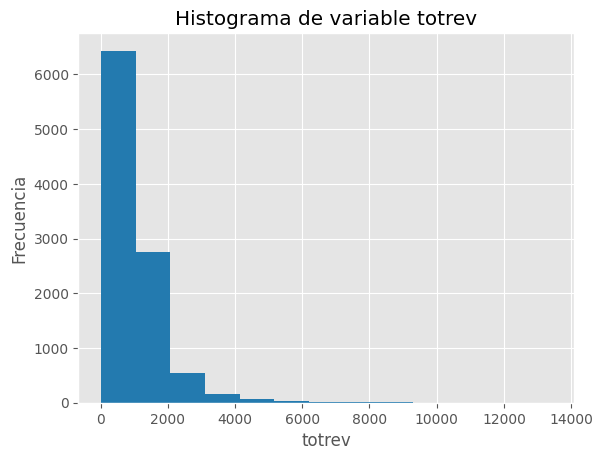

In [66]:
plt.style.use('ggplot')
plt.hist(df3["totrev"],bins=13,color="#237AAF")
plt.title('Histograma de variable totrev')
plt.xlabel("totrev");plt.ylabel("Frecuencia")
plt.show()

In [67]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#### Boxplot

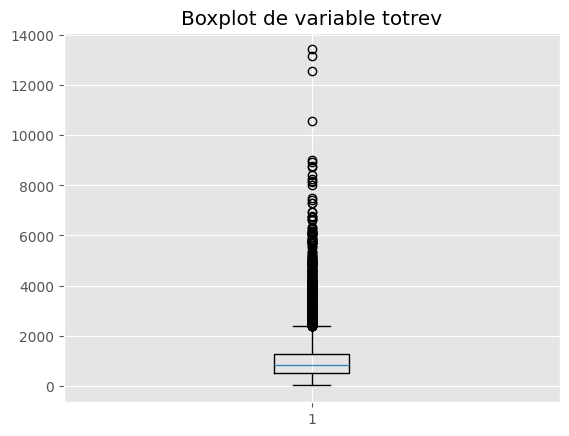

In [68]:
plt.style.use('ggplot')
plt.boxplot(df3["totrev"])
plt.title('Boxplot de variable totrev')
plt.show()

#### Gráficas a partir de `groupby`

In [69]:
df_con_etiquetas.head(1)

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,Nivel_totrev2,Nivel
Customer_ID,,,,,,,,,,
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH AREA,N,Alto,Alto


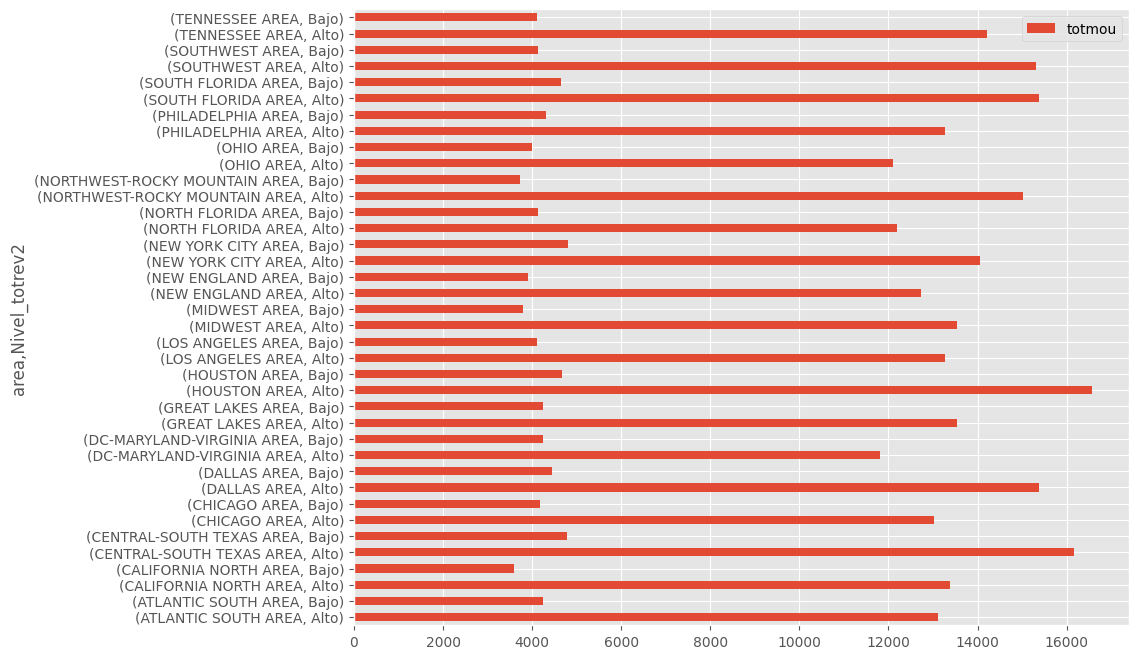

In [70]:
df4 = df_con_etiquetas.groupby(['area','Nivel_totrev2'])[['totmou']].mean()
df4.plot(kind='barh',figsize=(10,8))
plt.show()

#### Gráficas de `pandas`  

El modulo`.plot()` genera por defecto una gráfica de línea, existen varios gráficos para los `DataFrameGroup`

    - 'line' : Gráfica de línea
    - 'bar' :  Diagrama de barras vertical
    - 'barh' : Diagrama de barras horizontal
    - 'hist' : histograma
    - 'box' : boxplot
    - 'kde' : Kernel de densidad
    - 'area' : Gráfica de área
    - 'pie' : Diagrama de torta
    - 'scatter' : Diagrama de dispersión
    - 'hexbin' : Diagrama de hexágonos

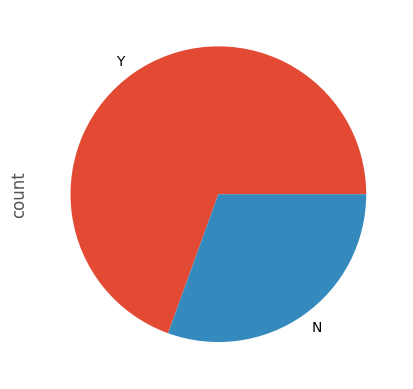

In [71]:
df3["creditcd_x"].value_counts().plot(kind="pie")
plt.show()

Revisando la relación entre las dos variables `totrev` y `totmou`

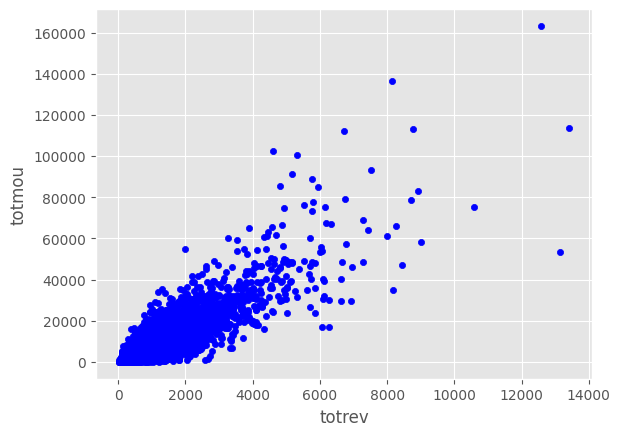

In [72]:
df3.plot(kind="scatter",x='totrev',y='totmou',c='blue')
plt.show()

### `Seaborn`

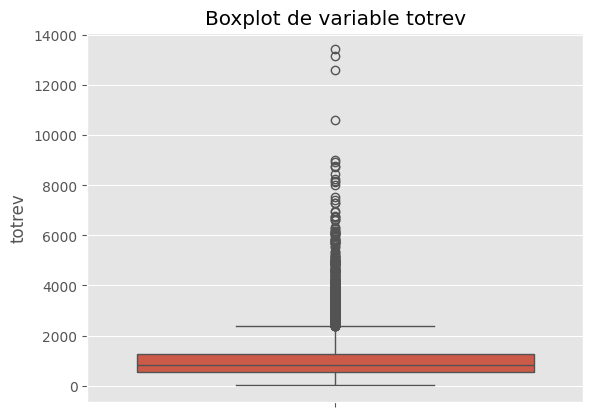

In [73]:
import seaborn as sns
sns.boxplot(df3["totrev"],orient='v')
plt.title('Boxplot de variable totrev')
plt.show()

### Gráficas de parcela 

In [74]:
df3

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,Nivel_totrev2
Customer_ID,,,,,,,,,
1082423,7269.0,906.58,Y,371,14.333333,U,NEW ENGLAND AREA,Y,Bajo
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH AREA,N,Alto
1031705,4152.0,577.39,Y,675,3.000000,U,NEW YORK CITY AREA,Y,Bajo
1089806,1863.0,294.26,Y,218,11.000000,U,CHICAGO AREA,Y,Bajo
1076695,4155.0,433.16,N,222,0.000000,U,NORTH FLORIDA AREA,N,Bajo
...,...,...,...,...,...,...,...,...,...
1027614,2570.0,484.31,Y,611,0.666667,U,CHICAGO AREA,Y,Bajo
1098422,2105.0,583.36,Y,1243,0.000000,U,SOUTHWEST AREA,Y,Bajo
1096497,3690.0,294.29,Y,212,0.666667,Y,NEW ENGLAND AREA,Y,Bajo


<Figure size 11600x800 with 0 Axes>

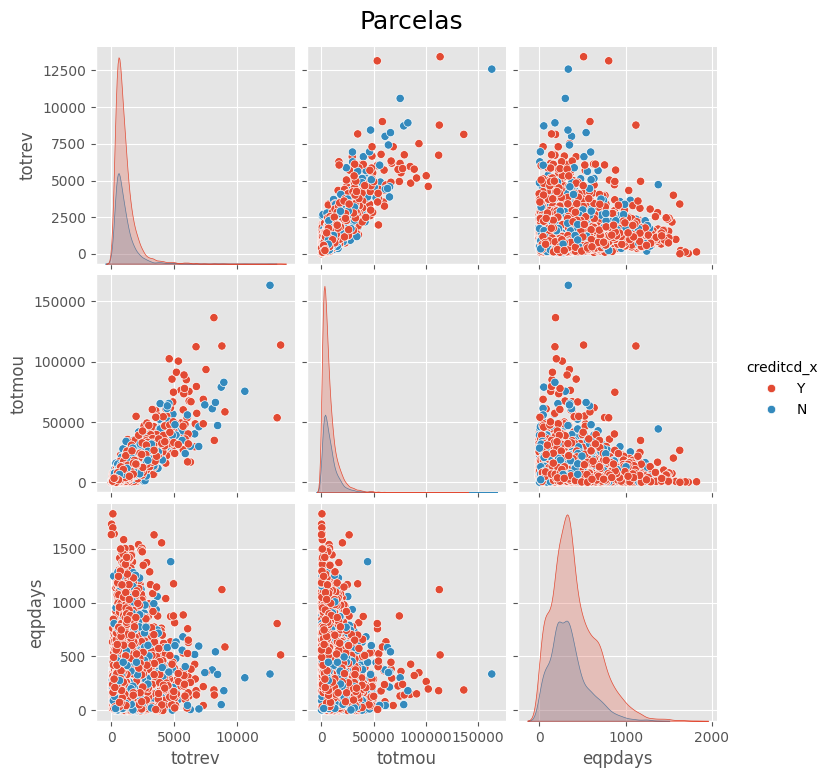

In [76]:
plt.figure(figsize=(116,8))
sns.pairplot(data=df3, hue='creditcd_x', vars=['totrev','totmou','eqpdays'])
plt.suptitle("Parcelas",size=18, y=1.03) # Utilizamos la funcion .suptitle y los parametros size=18, y=1.03 para centrar el titulo de manera adecuada
plt.show()

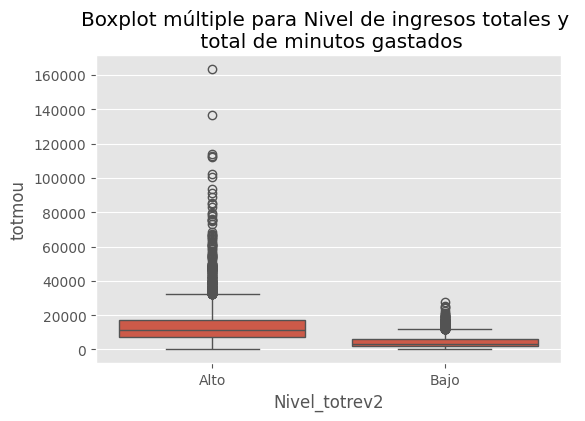

In [77]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Nivel_totrev2',y='totmou',data=df_con_etiquetas)
plt.title('Boxplot múltiple para Nivel de ingresos totales y \n total de minutos gastados')
plt.show()

C:\Users\aluca\AppData\Local\Temp\ipykernel_26748\2817809031.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y="totmou", x="Nivel_totrev2", kind="violin", data=df_con_etiquetas, height=4, aspect=4, palette='Set2')


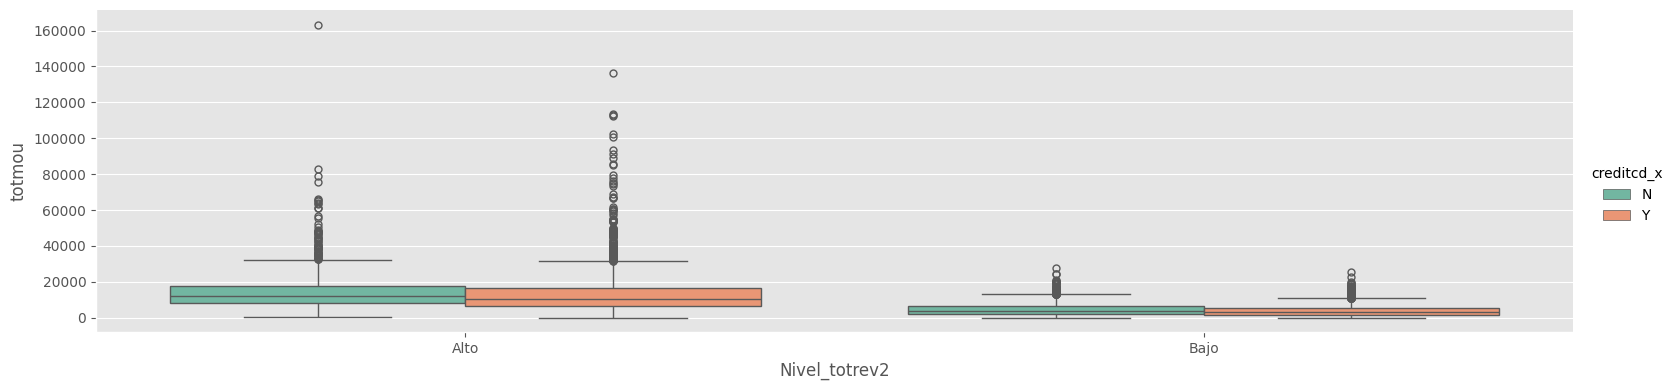

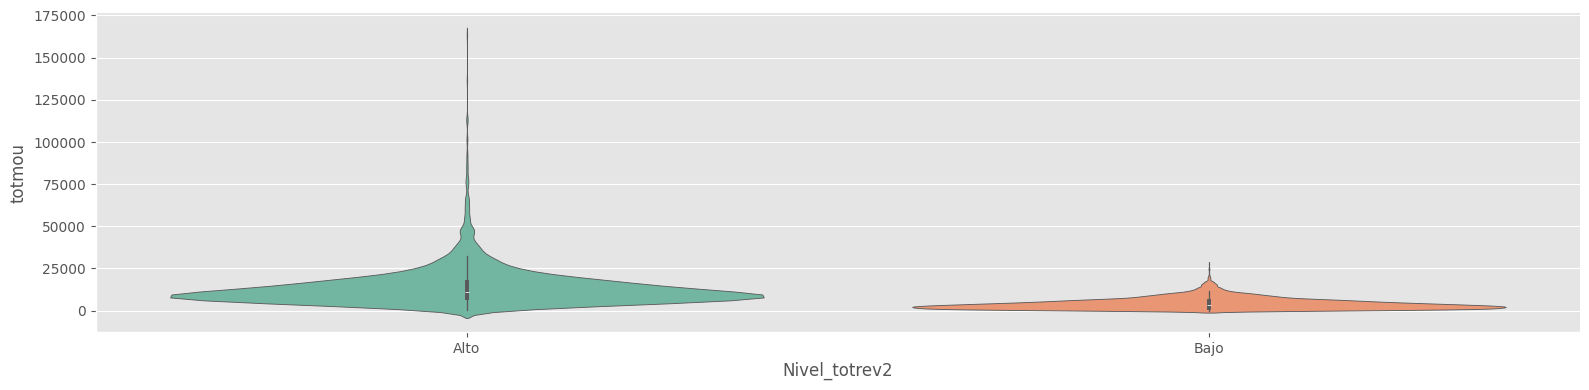

In [79]:
sns.catplot(y="totmou", x="Nivel_totrev2", kind="box",    data=df_con_etiquetas, height=4, aspect=4, palette='Set2', hue='creditcd_x') #Agregamos un parametro de division hue='creditcd_x' para visualizar por los que tienen y no tienen credito
sns.catplot(y="totmou", x="Nivel_totrev2", kind="violin", data=df_con_etiquetas, height=4, aspect=4, palette='Set2')
plt.show()

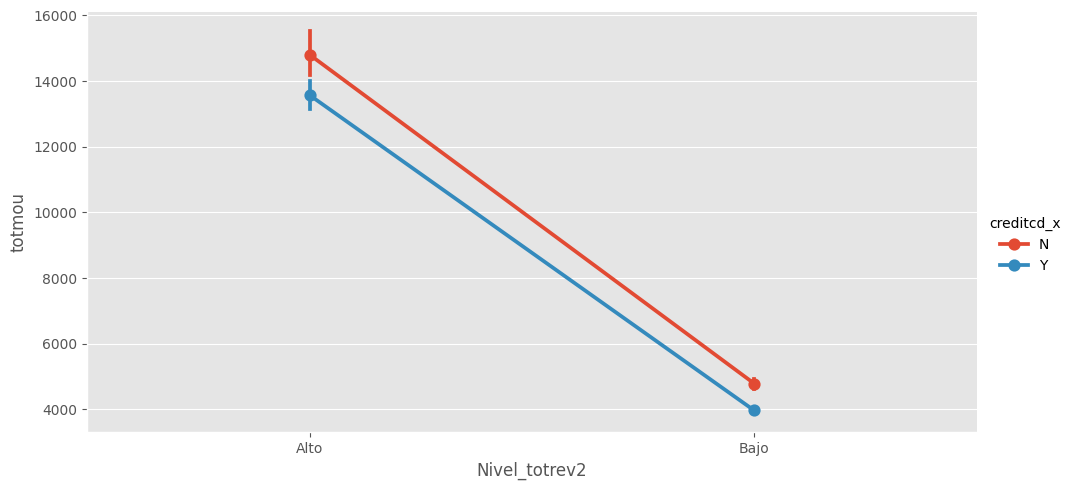

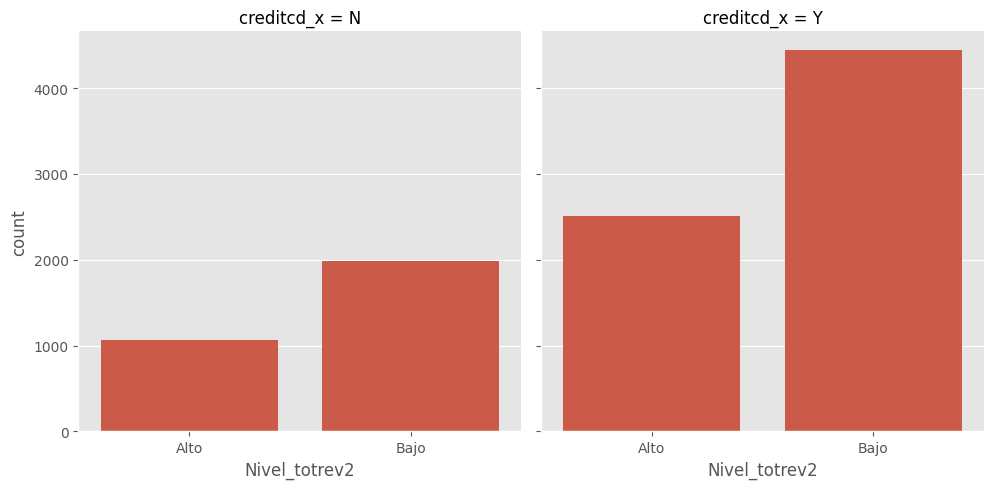

In [80]:
ax = sns.catplot(y="totmou", x="Nivel_totrev2", hue='creditcd_x', kind='point',data=df_con_etiquetas, aspect=2)
ax = sns.catplot(x="Nivel_totrev2", kind='count',data=df_con_etiquetas, col='creditcd_x')
plt.show()

### Ejercicio 5

Realice un  boxplot para la variable totmou segmentado por las variable  credict_x y Nivel_totrev

In [81]:
df_con_etiquetas.columns

Index(['totmou', 'totrev', 'creditcd_x', 'eqpdays', 'custcare_Mean',
       'new_cell', 'area', 'creditcd_y', 'Nivel_totrev2', 'Nivel'],
      dtype='object')

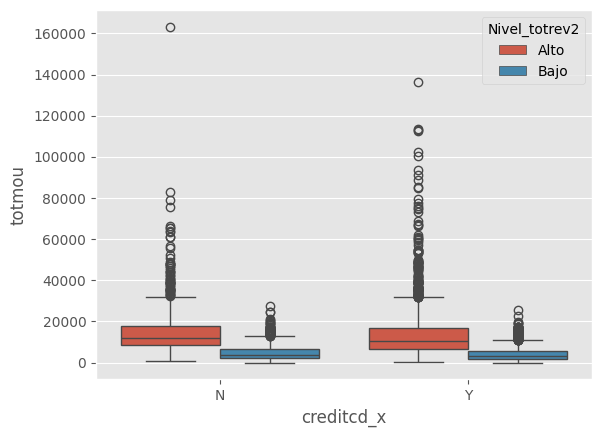

In [83]:
sns.boxplot(data= df_con_etiquetas, x='creditcd_x', y='totmou', hue='Nivel_totrev2') 
plt.show()

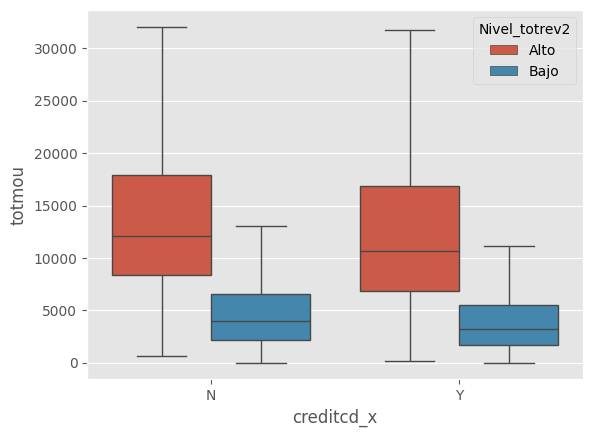

In [85]:
sns.boxplot(data= df_con_etiquetas, x='creditcd_x', y='totmou', hue='Nivel_totrev2', showfliers=False) #Utilizamos el parametro showfliers=False para visualizar sin los datos atipicos de la muestra
plt.show()

Grupo:
### Carlos Mauricio Arteaga Bermudez
### Miguel Angel Pablos Perea

## Resumen


1. Leer datos desde archivos.
2. Agregar y manipular datos .
3. Analizar estadísticas de resumen y reunir información.
4. Usar matplotlib para crear gráficos para hacer análisis visual, además de otras librerías.

Para más información

> [https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html)